In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('iris-data.csv', index_col= 0)

In [3]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [4]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [5]:
y = df['lar.petalo']
y

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: lar.petalo, Length: 150, dtype: float64

(array([ 2.,  9., 26., 11.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  2.,
         2.,  4.,  8.,  6., 12.,  8.,  9., 12.,  4.,  5.,  9.,  5.,  5.,
         1.,  1.,  3.,  1.]),
 array([1.        , 1.19666667, 1.39333333, 1.59      , 1.78666667,
        1.98333333, 2.18      , 2.37666667, 2.57333333, 2.77      ,
        2.96666667, 3.16333333, 3.36      , 3.55666667, 3.75333333,
        3.95      , 4.14666667, 4.34333333, 4.54      , 4.73666667,
        4.93333333, 5.13      , 5.32666667, 5.52333333, 5.72      ,
        5.91666667, 6.11333333, 6.31      , 6.50666667, 6.70333333,
        6.9       ]),
 <a list of 30 Patch objects>)

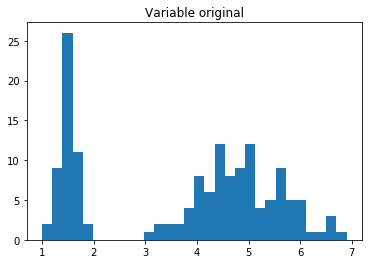

In [6]:
fig , ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins=30)

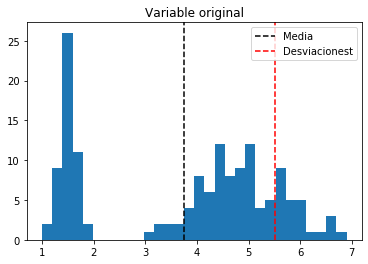

In [9]:
fig , ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y, bins=30)
ax.axvline(x=np.mean(y), c='k', label='Media', linestyle='--')
ax.axvline(x=np.mean(y)+np.std(y), c='red', label='Desviacionest', linestyle='--')
ax.legend()

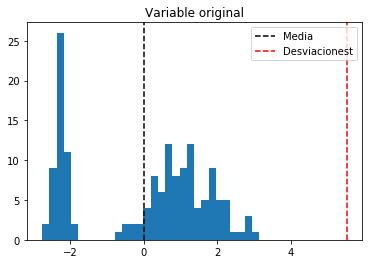

In [11]:
# Para estandarizar primero restamos la media a cada y
fig , ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y - np.mean(y), bins=30)
ax.axvline(x=np.mean(y- np.mean(y)), c='k', label='Media', linestyle='--')
ax.axvline(x=np.mean(y)+np.std(y), c='red', label='Desviacionest', linestyle='--')
ax.legend()

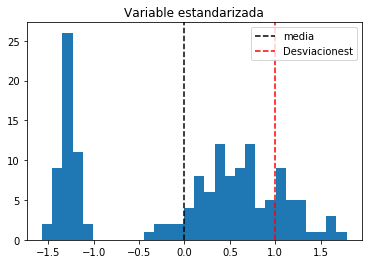

In [19]:
# Seguido a la resta debemos dividir el resultado sobre la desviacion estandar
fig , ax = plt.subplots()
ax.set_title('Variable estandarizada')
ax.hist((y - np.mean(y))/np.std(y), bins = 30)
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))), c= 'k', label='media', linestyle='--')
ax.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))) + np.std((y - np.mean(y))/np.std(y)), c='red', label='Desviacionest', linestyle='--')
ax.legend()

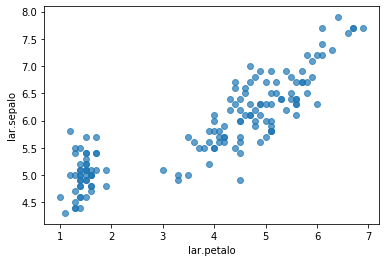

In [23]:
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha=0.7)
ax.set_xlabel('lar.petalo')
ax.set_ylabel('lar.sepalo')
ax.autoscale()

In [24]:
# Para ver la covarianza usamos la funcion cov
np.cov(df['lar.petalo'], df['lar.sepalo'])
# las relaciones puntuales son las esquinas superio derecho e inferior izquierdo
# las varianzas de cada una de als variables son entonces las contrarias

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [26]:
# Para calcular la correlacion usamos la funcion corr
df.corr(method = 'spearman')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


In [27]:
# Otra forma de calcular la correlacion es usando a kendall
df.corr(method = 'kendall')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.076997,0.718516,0.655309,0.670444
anc.sepalo,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
lar.petalo,0.718516,-0.185994,1.000000,0.806891,0.822911
anc.petalo,0.655309,-0.157126,0.806891,1.000000,0.839687
tipo_flor,0.670444,-0.337614,0.822911,0.839687,1.000000


In [28]:
corr = df.corr(method='kendall')

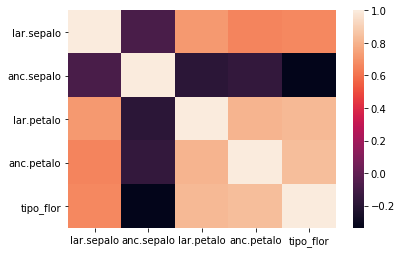

In [29]:
# para ver grafico de correlacion entre las 2 variables con colores usamos heatmap

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)